<a href="https://colab.research.google.com/github/jeongsukko/jejumaster-1/blob/main/2%EC%9D%BC%EC%B0%A8_%ED%83%90%EC%83%89%EC%A0%81%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EA%B5%AC%EC%94%A8%EB%A5%BC%EC%B0%BE%EC%95%84%EB%9D%BC_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 탐색적데이터 분석

## 3. 공공 데이터 분석-구씨를 찾아라



---



In [2]:
PATH = './sample_data/'
FILE = '성씨ㆍ본관별_인구__시군구_20231030.csv'

## [퀴즈] 전국 성씨 순위구하기

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

family_name = '조'

file = PATH+FILE
print(f'파일명 : {file}')
df = pd.read_csv(file, encoding = 'utf-8') #cp949: 윈도우OS 기본 인코딩 포맷

df.columns = ['성씨', '지역', '인구'] #컬럼이름 변경
df = df.query(" 지역 == '전국' and 성씨 != '계'") # 컬럼 세부 변경

# 성씨에서 한자 제외시키기 -----------
tmp1, tmp2, tmp3 = list(), list(), list()
for row in df.iterrows():
    tmp1.append(row[1]['성씨'].split('(')[0])
    tmp2.append(row[1]['지역'])
    tmp3.append(row[1]['인구'])

df_all = pd.DataFrame([ x for x in zip(tmp1,tmp2,tmp3)])
df_all.columns = df.columns
df_all
#-------------------------------------

# 한자를 다르게 쓰는 [성씨]를 [지역]별로 합계 구하기
df_all_group = df_all.groupby('성씨').sum(numeric_only=False)

# 지역별 합계 데이터를 '인구' 크기순으로 정렬하기
df_all_group = df_all_group.sort_values(by = '인구', ascending = False)

# 파일명 지정하여 저장하기
file = PATH+'my_family_name_ranking.csv'  # 파일명
df_all_group.to_csv(file, encoding = 'cp949', mode = 'w') # 파일 저장하기

df_all_group.head(10)

파일명 : ./sample_data/성씨ㆍ본관별_인구__시군구_20231030.csv


,지역,인구
성씨,,
김,전국,10689959
이,전국,7306828
박,전국,4192074
정,전국전국전국,2407365
최,전국전국,2340509
조,전국전국,1453827
강,전국전국,1268472
윤,전국,1020547
장,전국전국전국,1019993


----------------------------------

## 구씨를 찾아라!

### 3-1.파이썬으로 데이터 분석하는 순서
 [사전준비] 필요한 파이썬 라이브러리 설치하기
 1. 데이터 준비하기 : 웹 사이트에서 공공데이터 다운로드하기
 2. 데이터 불러오기 : 파이썬으로 데이터 읽어서 표로 나타내기
 3. 데이터 전처리하기 : 필요한 데이터만 추출하기
 4. 데이터 시각화하기 : 데이터 그래프로 나타내기
 5. 데이터 저장하기 :  파일로 저장하기

---

**[주의!] (코랩)한글 폰트 지정하는 방법**

In [10]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 코랩에서 위 코드를 실행시킨 후  반드시 코랩 메뉴: "런타임>런타임 다시 시작" 합니다.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (11.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120874 files and direc

### 0.[사전준비] 라이브러리 설치 확인하기
아래 코드를 실행한 후 오류 메시지가 없으면 성공적으로 설치된 것입니다.

In [14]:
import pandas  as pd
import numpy as np
import matplotlib as plt
print(pd.__version__)
print(np.__version__)
print(plt.__version__)

1.5.3
1.23.5
3.7.1


### 1.데이터 다운로드하기

- 국가통계포털 사이트  https://kosis.kr/index/index.do
- 성씨ㆍ본관별_인구__시군구_~.csv 다운로드하기
 - ./sample_data/자신이다운로드한파일

---

### 2.데이터 불러오기 : 파이썬으로 데이터 읽어서 표로 나타내기
파일명(성씨ㆍ본관별_인구__시군구_~.csv)에서 뒷부분 숫자는 다운로드된 날짜의 시간정보로 선생님과 다를 수 있으니 자신이 다운로드 받은 파일명을 사용하면 됩니다.

In [15]:
import pandas as pd

file = PATH+FILE
df = pd.read_csv(file, encoding = 'utf-8') #cp949: 윈도우OS 기본 인코딩 포맷
df.head(5)

,"성씨, 본관별",행정구역별(시군구),2015
0,계,전국,49705663
1,계,서울특별시,9567196
2,계,부산광역시,3404667
3,계,대구광역시,2436770
4,계,인천광역시,2822601


---

### 3.데이터 전처리하기 : 필요한 데이터만 추출하기

#### @컬럼이름 변경하기

In [16]:
# 현재 컬럼이름 출력하기
df.columns

Index(['성씨, 본관별', '행정구역별(시군구)', '2015'], dtype='object')

In [17]:
# 컬럼이름 변경하기
df.columns = ['성씨', '지역', '인구']
df.columns

Index(['성씨', '지역', '인구'], dtype='object')

#### @고유한 성씨만 출력하기

In [18]:
# 고유한 성씨(한자포함) 출력하기
set(df['성씨'])

{'가(賈)',
 '간(簡)',
 '갈(葛)',
 '감(甘)',
 '강(姜)',
 '강(康)',
 '견(甄)',
 '경(慶)',
 '경(景)',
 '계',
 '계(桂)',
 '고(高)',
 '공(孔)',
 '곽(郭)',
 '구(丘)',
 '구(具)',
 '국(鞠)',
 '권(權)',
 '금(琴)',
 '기(奇)',
 '기타',
 '길(吉)',
 '김(金)',
 '나(羅)',
 '남(南)',
 '남궁(南宮)',
 '노(盧)',
 '노(魯)',
 '단(段)',
 '당(唐)',
 '도(都)',
 '도(陶)',
 '동(董)',
 '두(杜)',
 '라(羅)',
 '류(柳)',
 '마(馬)',
 '맹(孟)',
 '명(明)',
 '모(牟)',
 '목(睦)',
 '문(文)',
 '민(閔)',
 '박(朴)',
 '반(潘)',
 '방(房)',
 '방(方)',
 '배(裵)',
 '백(白)',
 '범(范)',
 '변(卞)',
 '변(邊)',
 '복(卜)',
 '봉(奉)',
 '부(夫)',
 '빈(賓)',
 '사(史)',
 '사공(司空)',
 '상(尙)',
 '서(徐)',
 '서문(西門)',
 '석(昔)',
 '석(石)',
 '선(宣)',
 '선우(鮮于)',
 '설(偰)',
 '설(薛)',
 '성(成)',
 '소(蘇)',
 '소(邵)',
 '손(孫)',
 '송(宋)',
 '승(承)',
 '시(施)',
 '시(柴)',
 '신(愼)',
 '신(申)',
 '신(辛)',
 '심(沈)',
 '안(安)',
 '양(梁)',
 '양(楊)',
 '어(魚)',
 '엄(嚴)',
 '여(余)',
 '여(呂)',
 '연(延)',
 '염(廉)',
 '예(芮)',
 '오(吳)',
 '옥(玉)',
 '온(溫)',
 '왕(王)',
 '용(龍)',
 '우(禹)',
 '원(元)',
 '위(魏)',
 '유(兪)',
 '유(劉)',
 '유(庾)',
 '유(柳)',
 '육(陸)',
 '윤(尹)',
 '은(殷)',
 '음(陰)',
 '이(李)',
 '인(印)',
 '임(任)',
 '임(林)',
 '장(張)',
 '장(章)'

In [19]:
# 고유한 성씨(한자포함) 총개수 출력하기
len(set(df['성씨']))

155

In [24]:
# 한글 성씨만 출력하기 -> '가(賈)'--> 가  만 추출하기
familyname = set(name.split('(')[0] for name in set(df['성씨']) )
familyname

# 고유한 한글 성씨 총개수 출력하기
len(familyname)

120

In [ ]:
df
df

---------------------

#### @[성씨]가  '구'인 데이터 추출하기

In [26]:
# [성씨] 열에서 '구'가 포함된 데이터 출력하기
df[df['성씨'].str.contains('구')]


# [성씨] 열에서 '구'가 포함되고, [지역] 열에서 '전국' 제외하고 가져오기
df_goo = df[df['성씨'].str.contains('구') & (df['지역'] != '전국')]
df_goo

,성씨,지역,인구
248,구(丘),서울특별시,3855
249,구(丘),부산광역시,162
250,구(丘),대구광역시,126
251,구(丘),인천광역시,974
252,구(丘),광주광역시,60
253,구(丘),대전광역시,1175
254,구(丘),울산광역시,110
255,구(丘),세종특별자치시,106
256,구(丘),경기도,4781
257,구(丘),강원도,217


### **[실습문제] 자신의 성씨 데이터 출력하기**


In [27]:
# [성씨] 열에서 '구'가 포함되고, [지역] 열에서 '전국' 제외하고 가져오기
df_my = df[df['성씨'].str.contains('고') & (df['지역'] != '전국')]
df_my

,성씨,지역,인구
194,고(高),서울특별시,91060
195,고(高),부산광역시,23273
196,고(高),대구광역시,10564
197,고(高),인천광역시,30791
198,고(高),광주광역시,18177
199,고(高),대전광역시,13098
200,고(高),울산광역시,8425
201,고(高),세종특별자치시,1736
202,고(高),경기도,111403
203,고(高),강원도,14959


#### @데이터 그룹핑: ‘구’씨 성을 가진 데이터를 [지역]별로 [인구] 합계 출력하기

In [28]:
# 1.'구'씨 데이터를 [지역]별 합계 구하기
# df_goo_group = df_goo.groupby('지역').sum()
df_goo_group = df_goo.groupby('지역').sum(numeric_only=False)
# df_goo_group


# 2.지역별 합계 데이터를 '인구' 크기순으로 정렬하기
df_goo_group = df_goo_group.sort_values(by = '인구', ascending = False)
df_goo_group

,성씨,인구
지역,,
경기도,구(丘)구(具),47572
서울특별시,구(丘)구(具),38857
경상남도,구(丘)구(具),20367
부산광역시,구(丘)구(具),17871
대구광역시,구(丘)구(具),15313
인천광역시,구(丘)구(具),12028
충청남도,구(丘)구(具),10061
경상북도,구(丘)구(具),10000
대전광역시,구(丘)구(具),6295


### **[실습문제] 자신의 한글 성씨 데이터를 [지역]별로 [인구] 합계 출력하기**

In [29]:
# 자신의 한글 성씨 데이터를 지역별 합계 데이터를 '인구' 크기순으로 정렬하기
df_my_group = df_my.groupby('지역').sum(numeric_only=False)
df_my_group = df_my_group.sort_values(by = '인구', ascending = False)
df_my_group

,성씨,인구
지역,,
경기도,고(高),111403
서울특별시,고(高),91060
제주특별자치도,고(高),41935
인천광역시,고(高),30791
전라북도,고(高),24171
부산광역시,고(高),23273
경상남도,고(高),19365
전라남도,고(高),19125
광주광역시,고(高),18177


---------------------------

### 4.데이터 시각화하기 : 데이터 그래프로 나타내기
- 색상 참고 :  https://matplotlib.org/stable/gallery/color/named_colors.html

#### @막대 그래프로 시각화하기

In [30]:
df_goo_group.columns

Index(['성씨', '인구'], dtype='object')

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

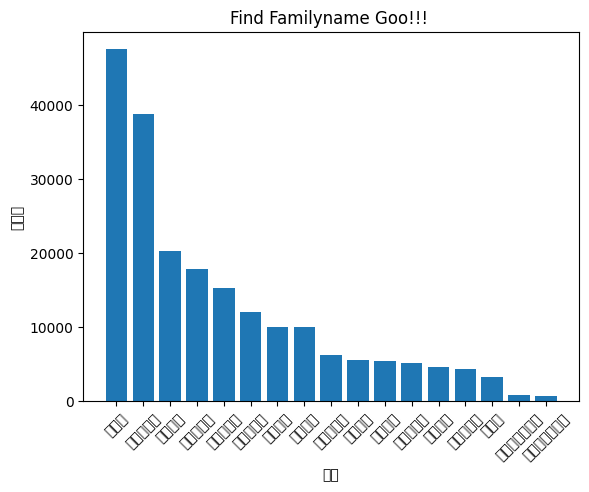

In [31]:
import matplotlib.pyplot as plt

# 코랩에서 한글 폰트 설치한 후 사용하기!!!
# plt.rc('font', family='cmb10')                  # (코랩)한글 폰트
plt.rc('font', family='NanumBarunGothic')       # (코랩)한글 폰트
# plt.rc('font', family='Malgun Gothic')          # (win)한글 폰트


# 1.그래프 데이터 지정하기(X축, Y축)
x = df_goo_group.index     # 지역
y = df_goo_group['인구']   # 인구수

# 2.그래프 그리기
plt.bar(x, y)

# 3. 그래프 꾸미기
# plt.title('대한민국 "구씨"를 찾아라') # 그래프 제목
plt.title('Find Familyname Goo!!! ') # 그래프 제목
plt.xlabel('지역')                    # x축 이름
plt.ylabel('인구수')                  # y축 이름
plt.xticks(rotation = 45)             # X축 레이블 회전
plt.show()                            # 그래프 출력하기

#### @그래프 꾸미기

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50472 (\N{HANGUL SYLLABLE SSI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47484 (\N{HANGUL SYLLABLE REUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52286 (\N{HANGUL SYLLABLE CAJ}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


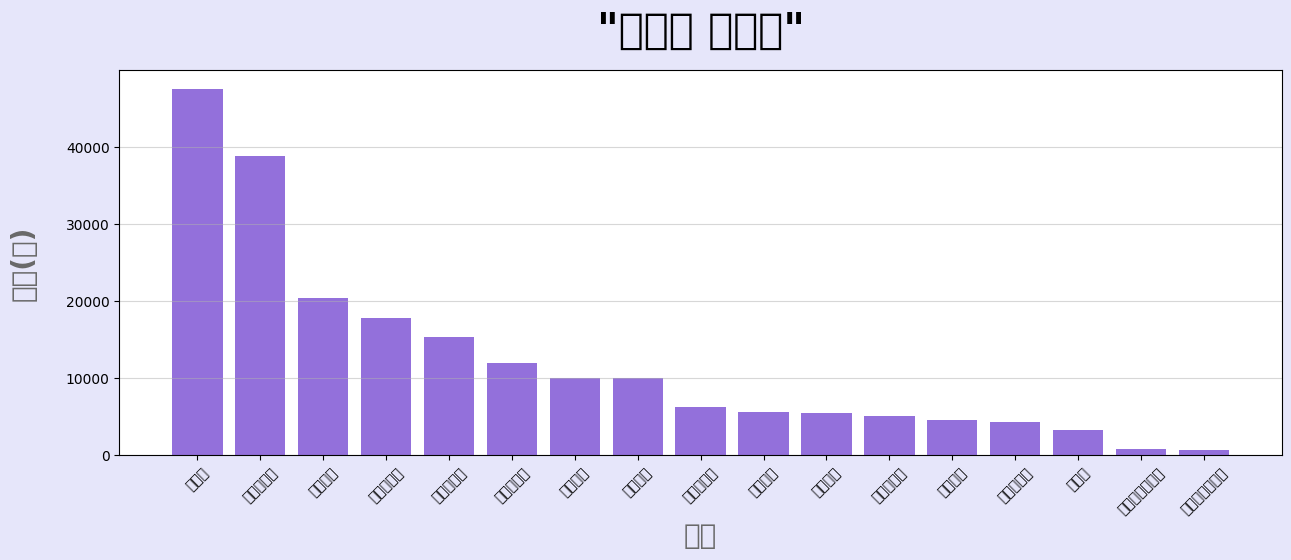

In [32]:
import matplotlib.pyplot as plt

# 1.그래프 데이터 지정하기(X축, Y축)
x = df_goo_group.index     # 지역
y = df_goo_group['인구']   # 인구수

# 2.그래프 그리기
plt.figure(figsize = (15, 5), facecolor = 'lavender') # 그래프 크기와 색상
plt.bar(x, y, color = 'mediumpurple')  # 막대 그래프 그리기

# 3. 그래프 꾸미기
plt.title('"구씨를 찾아라"', pad = 20,                # 그래프 제목
          fontdict = {'size':30, 'color':'black', 'weight':'bold'})
plt.xlabel('지역', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'})
plt.ylabel('인구(명)', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'}, labelpad = 20)
plt.xticks(rotation = 45)                   # X축 레이블 회전
plt.grid(True, axis = 'y', alpha = 0.5)    # 그래프에 그리드 표현하기

plt.show() # 그래프 그리기

#### @선 그래프로 시각화하기

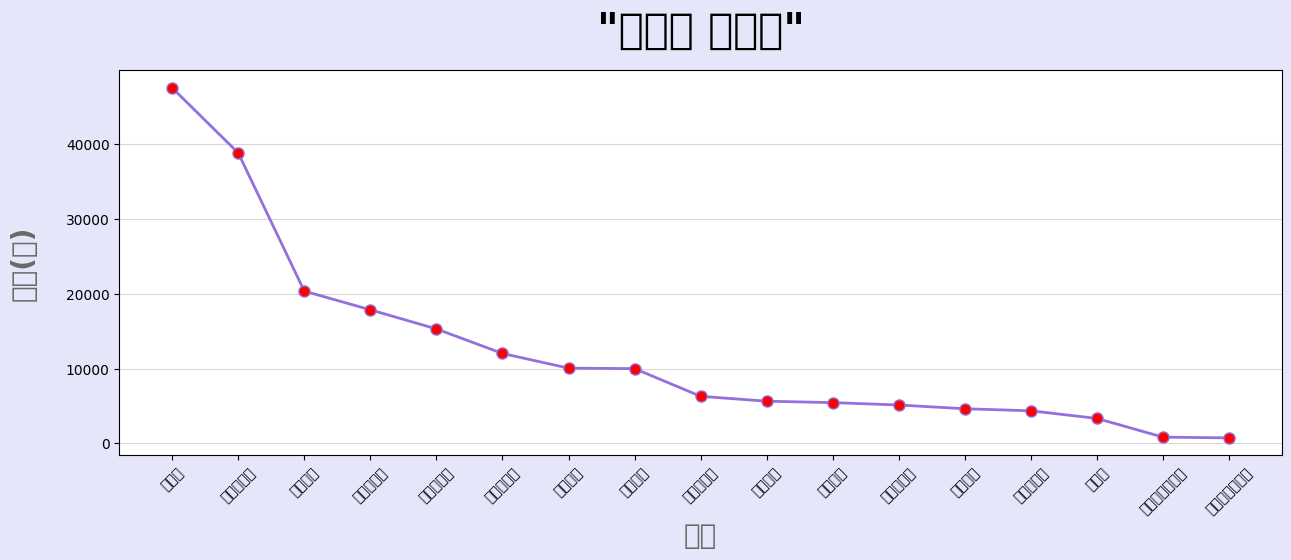

In [33]:
# 1.그래프 데이터 지정하기(X축, Y축)
x = df_goo_group.index     # 지역
y = df_goo_group['인구']   # 인구수

# 2.그래프 그리기 (선그래프 그리기)
plt.figure(figsize = (15, 5), facecolor = 'lavender') # 그래프 크기와 색상
plt.plot(x, y, color='mediumpurple', marker='o', linestyle='solid',
         linewidth=2, markersize=8, markerfacecolor='red')

# 3. 그래프 꾸미기
plt.title('"구씨를 찾아라"', pad = 20,                # 그래프 제목
          fontdict = {'size':30, 'color':'black', 'weight':'bold'})
plt.xlabel('지역', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'})
plt.ylabel('인구(명)', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'}, labelpad = 20)
plt.xticks(rotation = 45)                   # X축 레이블 회전
plt.grid(True, axis = 'y', alpha = 0.5)    # 그래프에 그리드 표현하기

plt.show() # 그래프 그리기

#### @혼합 그래프

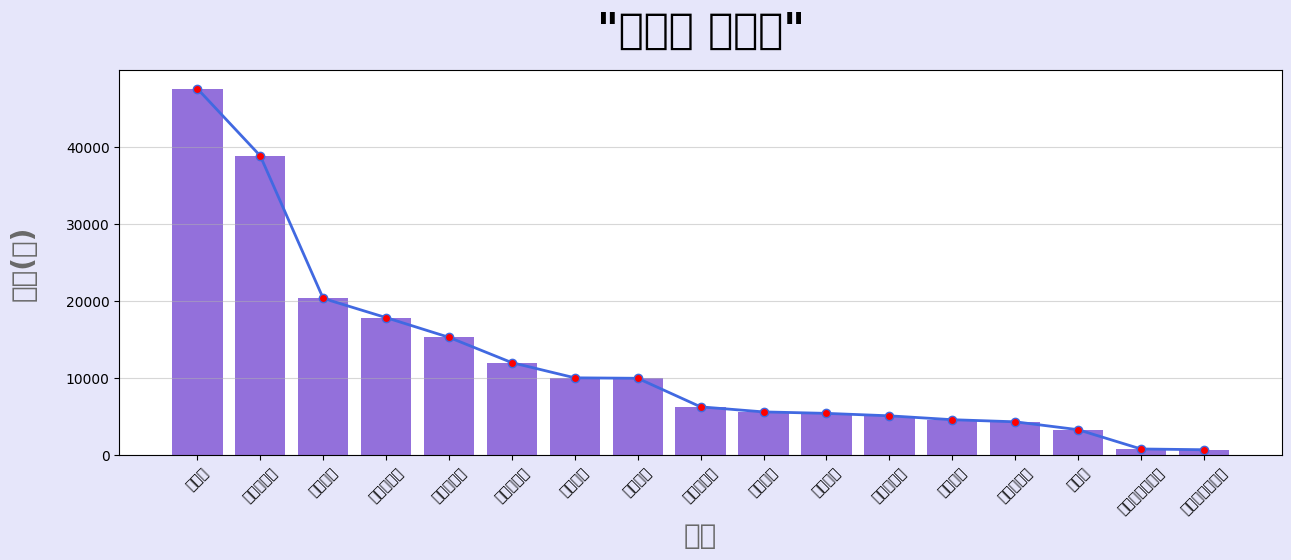

In [34]:
import matplotlib.pyplot as plt


# 1.그래프 데이터 지정하기(X축, Y축)
x = df_goo_group.index     # 지역
y = df_goo_group['인구']   # 인구수

# 2.그래프 그리기
plt.figure(figsize = (15, 5), facecolor = 'lavender') # 그래프 크기와 색상
plt.bar(x, y, color = 'mediumpurple')          # 막대 그래프
plt.plot(x, y, color='royalblue', marker='o',  # 선 그래프
         linewidth=2, markerfacecolor='red')

# 3.그래프 꾸미기
plt.title('"구씨를 찾아라"', pad = 20,                # 그래프 제목
          fontdict = {'size':30, 'color':'black', 'weight':'bold'})
plt.xlabel('지역', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'})
plt.ylabel('인구(명)', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'}, labelpad = 20)
plt.xticks(rotation = 45)                 # X축 레이블 회전
plt.grid(True, axis = 'y', alpha = 0.5)  # 그래프에 그리드 표현하기

plt.show() # 그래프 그리기

### 5. 데이터 저장하기 : 데이터 파일로 저장하기

In [35]:
# 파일명 지정하여 저장하기
file = './sample_data/family_name_goo.csv'  # 파일명
df_goo_group.to_csv(file, encoding = 'cp949', mode = 'w') # 파일 저장하기

-----------------------------------------

### **[실습문제] 워드클라우드로 시각화하기**

In [43]:
# 라이브러리 설치하기
!pip install wordcloud

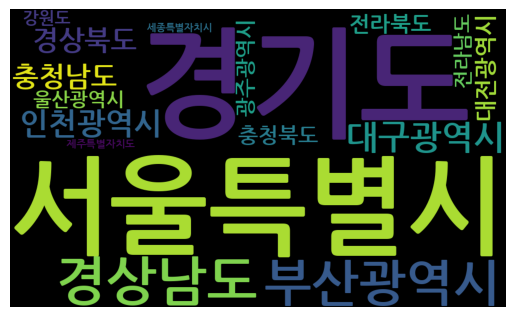

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. (win)폰트 지정: 자신의 컴퓨터 환경에 맞는 한글 폰트 경로
# font_path = 'malgun'  # C:/Windows/Fonts/
# font_path = 'HMFMOLD' # C:/Windows/Fonts/HMKMMAG.TTF     #HMFMOLD.TTF

# 1. (코랩)폰트 지정: 자신의 컴퓨터 환경에 맞는 한글 폰트 경로
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'

# 2.전처리된 데이터 지정하기
names = df_goo_group.index     # 지역
counts = df_goo_group['인구']  # 인구수
data = dict(zip(names, counts)) # 워드클라우드는 딕셔너리 형태로 만들기

# 3.워드클라우드 그래프로 시각화하기
wc = WordCloud(width = 1000, height = 600,
               background_color="black", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(data))
plt.axis("off")
plt.show()

# 4.파일로 저장하기
wc.to_file('./구씨_워드클라우드.png')



---



### **[[미션]]**
자신의 성씨 데이터 지역별로 그룹핑해서 그래프 그리고 데이터 파일을 저장하기 나타내기

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50472 (\N{HANGUL SYLLABLE SSI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

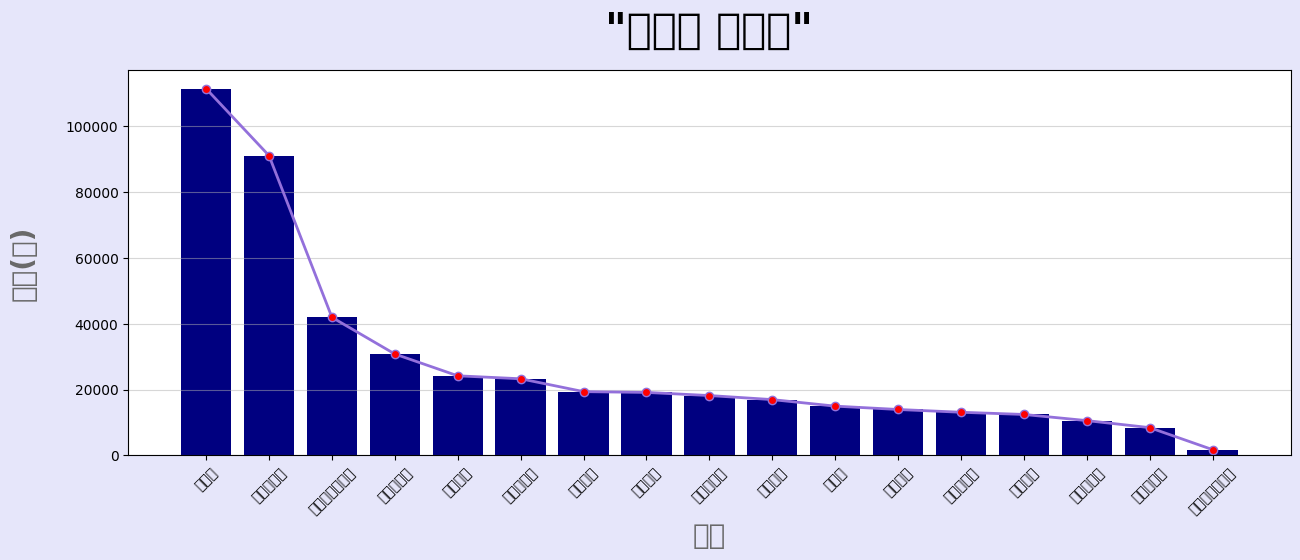

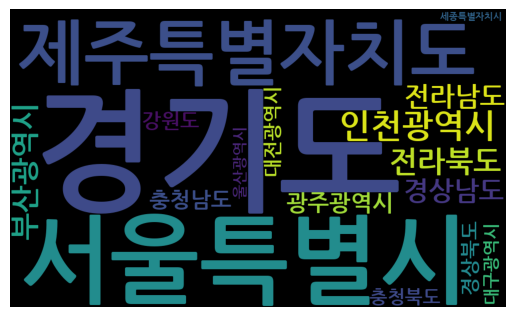

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

family_name = '고'

file = PATH+FILE
df = pd.read_csv(file, encoding = 'utf-8') #cp949: 윈도우OS 기본 인코딩 포맷

# 컬럼 이름 변경하기
df.columns = ['성씨', '지역', '인구']


#------------------------
# 자신의 성씨 데이터 지역별로 합계구하기
#------------------------
# '성씨'열에서 '조'가 포함되고, '지역'열에서 '전국' 제외하여 가져오기
df_my = df[df['성씨'].str.contains(family_name) & (df['지역'] != '전국')]

# 한자를 다르게 쓰는 '구'씨를 '지역'별로 합계 구하기
df_my_group = df_my.groupby('지역').sum(numeric_only=False)

# 지역별 합계 데이터를 '인구' 크기순으로 정렬하기
df_my_group = df_my_group.sort_values(by = '인구', ascending = False)


#------------------------
# 그래프 그리기
#------------------------
x = df_my_group.index    # 지역
y = df_my_group['인구']

plt.figure(figsize = (15, 5), facecolor = 'lavender')
plt.bar(x, y, color = 'navy') # 막대 그래프
plt.plot(x, y, color='mediumpurple', marker='o', linewidth=2, markerfacecolor='red') # 선 그래프

plt.title(f'"{family_name}씨를 찾아라"', fontdict = {'size': 30, 'color': 'black', 'weight': 'bold'}, pad = 20)

plt.xlabel('지역', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'})
plt.ylabel('인구(명)', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'}, labelpad = 20)
plt.xticks(rotation = 45)
plt.grid(True, axis = 'y', alpha = 0.5)

plt.show()

#------------------------
# 파일명 지정하여 저장하기
#------------------------
file = PATH+'my_family_name.csv'  # 파일명
df_my_group.to_csv(file, encoding = 'utf-8', mode = 'w') # 파일 저장하기


#------------------------
# 워드클라우드 지정하여 저장하기
#------------------------
from wordcloud import WordCloud

# 1. (win)폰트 지정: 자신의 컴퓨터 환경에 맞는 한글 폰트 경로
# font_path = 'malgun'  # C:/Windows/Fonts/
# font_path = 'HMKMMAG' # C:/Windows/Fonts/HMKMMAG.TTF

# 1. (코랩)폰트 지정: 자신의 컴퓨터 환경에 맞는 한글 폰트 경로
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'

# 2.전처리된 데이터 지정하기
names = df_my_group.index     # 지역
counts = df_my_group['인구']  # 인구수
data = dict(zip(names, counts)) # 워드클라우드는 딕셔너리 형태로 만들기

# 3.워드클라우드 그래프로 시각화하기
wc = WordCloud(width = 1000, height = 600,
               background_color="black", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(data))
plt.axis("off")
plt.show()

# 4.파일로 저장하기
wc.to_file('./고씨_워드클라우드.png')

----------------------------------

THE END

**#### @투명한 이미지(알파값이 적용된)에 워드 클라우드 나타내기**
마스크 이미지 파일이 필요하다.

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import cv2
import numpy as np

# 자신의 컴퓨터 환경에 맞는 한글 폰트 경로를 설정(window에서)
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'  # 코랩에서
# font_path = 'malgun'  # C:/Windows/Fonts/
# font_path = 'H2HDRM' # C:/Windows/Fonts/H2HDRM.TTF


# (토큰명, 빈도수) 딕셔너리 타입으로 변환
names = df_my_group.index.tolist()
counts = df_my_group['인구']
data = dict(zip(names, counts))


# 워드클라우드로 그래프로 시각화
img = cv2.imread('./sample_data/apple.png')
# img = cv2.imread('./sample_data/kids-mask.png')
img_array = np.array(img)
wc = WordCloud(background_color="black",
               font_path=font_path, max_font_size=250, mask=img_array)
plt.imshow(wc.generate_from_frequencies(data))
plt.axis("off")
plt.show()

# 파일로 저장하기
wc.to_file('./사과모양_워드클라우드.png')